# Car Price Prediction

Importing libraries

In [1]:

import numpy as np                                # importing numpy numerical calculation
import pandas as pd                                 # impoting pandas dataframe manipulation
import warnings                                     # removing the warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor




In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

Reading the Csv data file using pandas

In [3]:

# Reading the two different csv files out of which second data set was having some bad line so skiped it

car_data_1=pd.read_csv('true_car_listings.csv')

car_data=car_data_1


Checking the shape of dataframe

In [4]:
# checking the total number of rows and columns
print(car_data.shape)
car_data.head()

(852122, 8)


,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


Checking for null values in the dataframe

In [5]:
# we can find that there is no null values in each particular columns 
car_data[car_data.isnull()].sum()

Price      0.0
Year       0.0
Mileage    0.0
City         0
State        0
Vin          0
Make         0
Model        0
dtype: object

In [6]:
car_data.describe()

,Price,Year,Mileage
count,852122.000000,852122.000000,8.521220e+05
mean,21464.100210,2013.289145,5.250779e+04
std,13596.202241,3.414987,4.198896e+04
min,1500.000000,1997.000000,5.000000e+00
25%,13000.000000,2012.000000,2.383600e+04
50%,18500.000000,2014.000000,4.025600e+04
75%,26995.000000,2016.000000,7.218600e+04
max,499500.000000,2018.000000,2.856196e+06


 Checking the info of the dataframe

In [7]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852122 entries, 0 to 852121
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    852122 non-null  int64 
 1   Year     852122 non-null  int64 
 2   Mileage  852122 non-null  int64 
 3   City     852122 non-null  object
 4   State    852122 non-null  object
 5   Vin      852122 non-null  object
 6   Make     852122 non-null  object
 7   Model    852122 non-null  object
dtypes: int64(3), object(5)
memory usage: 52.0+ MB


# Removing outlier from data frame

---



---



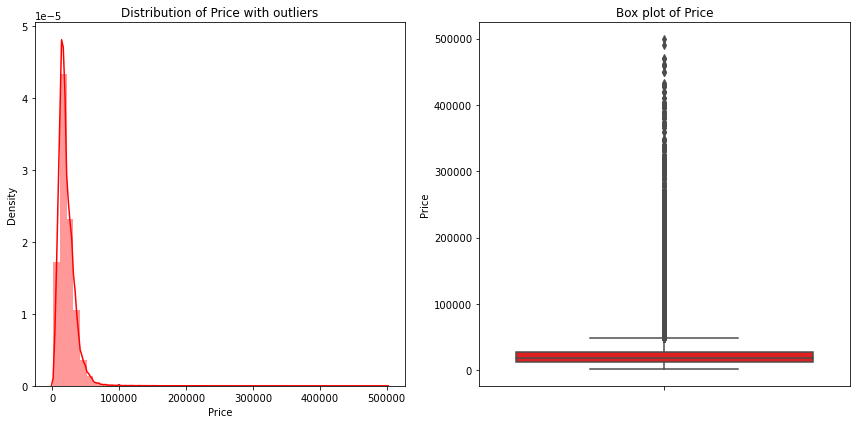

(852122, 8)


In [8]:
fig, axes = plt.subplots(1,2,figsize=(12,6))
# Distribution of price
sns.distplot(car_data['Price'],color='r',ax=axes[0])
sns.boxplot(y=car_data['Price'],color='r',ax=axes[1])
axes[0].set_title('Distribution of Price with outliers')
axes[1].set_title('Box plot of Price')
plt.tight_layout()
plt.show()
print(car_data.shape)
# we can find there are a lot of outlier in 'Price' column dataframe we need to remove it


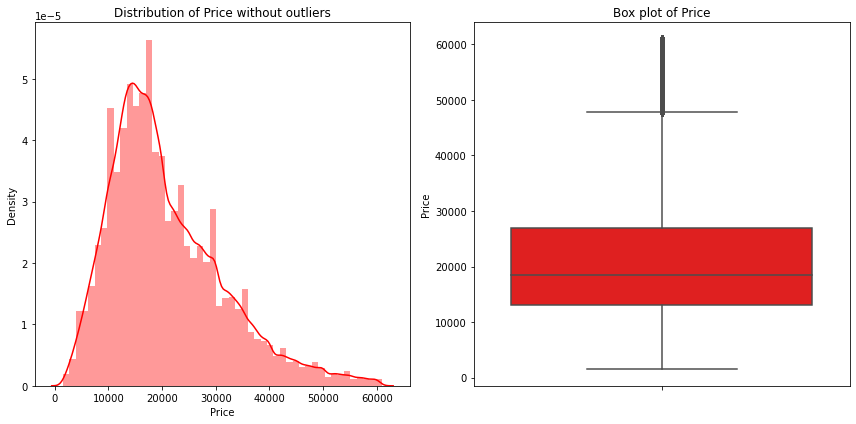

(843596, 8)


In [9]:
max_threshold=car_data['Price'].quantile(0.99)
car_data=car_data[car_data['Price']<max_threshold]

# Distribution of price
fig, axes = plt.subplots(1,2,figsize=(12,6))
sns.distplot(car_data['Price'],color='r',ax=axes[0])
sns.boxplot(y=car_data['Price'],color='r',ax=axes[1])
axes[0].set_title('Distribution of Price without outliers')
axes[1].set_title('Box plot of Price')
plt.tight_layout()
plt.show()
print(car_data.shape)   
# we can find lots of outlier have been removed from 'Price' 
# -- which is our target variable

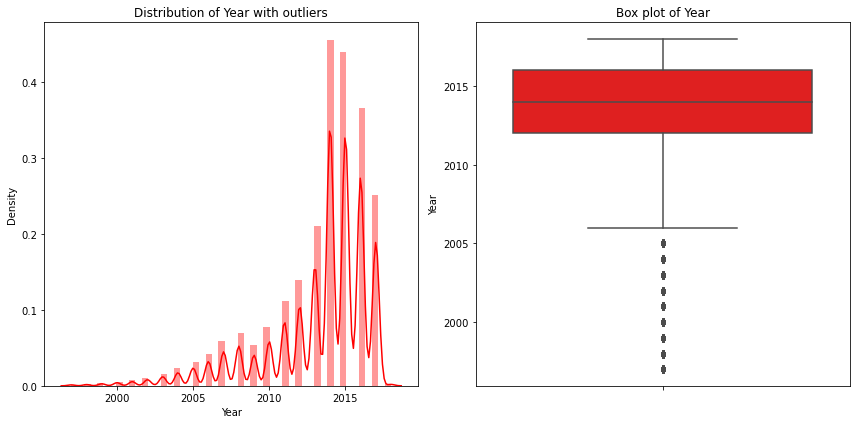

(843596, 8)


In [10]:
fig, axes = plt.subplots(1,2,figsize=(12,6))
# Distribution of Year
sns.distplot(car_data['Year'],color='r',ax=axes[0])
sns.boxplot(y=car_data['Year'],color='r',ax=axes[1])
axes[0].set_title('Distribution of Year with outliers')
axes[1].set_title('Box plot of Year')
plt.tight_layout()
plt.show()
print(car_data.shape)
# we can find there are a lot of outlier in 'year' column dataframe we need to remove it

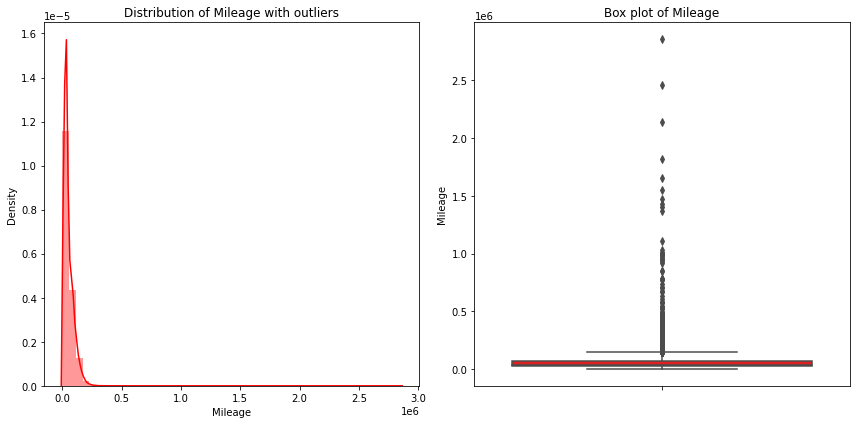

(843596, 8)


In [11]:
fig, axes = plt.subplots(1,2,figsize=(12,6))
# Distribution of Mileage
sns.distplot(car_data['Mileage'],color='r',ax=axes[0])
sns.boxplot(y=car_data['Mileage'],color='r',ax=axes[1])
axes[0].set_title('Distribution of Mileage with outliers')
axes[1].set_title('Box plot of Mileage')
plt.tight_layout()
plt.show()
print(car_data.shape)
# we can find there are a lot of outlier in our 'Mileage' column dataframe we need to remove it

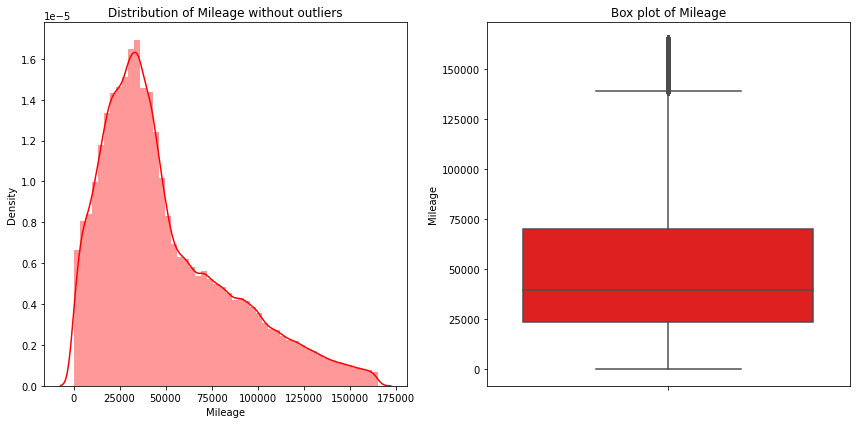

(826724, 8)


In [12]:
max_threshold=car_data['Mileage'].quantile(0.98)
car_data=car_data[car_data['Mileage']<max_threshold]

# Distribution of Mileage
fig, axes = plt.subplots(1,2,figsize=(12,6))
sns.distplot(car_data['Mileage'],color='r',ax=axes[0])
sns.boxplot(y=car_data['Mileage'],color='r',ax=axes[1])
axes[0].set_title('Distribution of Mileage without outliers')
axes[1].set_title('Box plot of Mileage')
plt.tight_layout()
plt.show()
print(car_data.shape)
# After removing 'Mileage' column outliers we can find most of the data have been represented

# we have removed the outliers we can work on each columns :
## 1 : we will try to univariate analysis :

In [13]:
# Univariate analysis

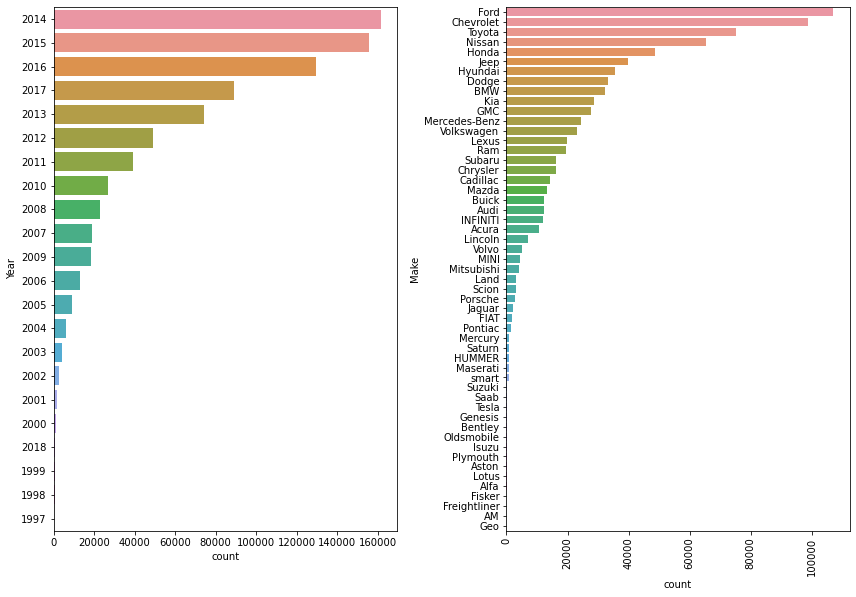

In [14]:
# Analysis for getting which year old vechile we have more

fig, axes = plt.subplots(1,2,figsize=(12,8))
sns.countplot(y=car_data['Year'],ax=axes[0],order = car_data['Year'].value_counts().index)
sns.countplot(y=car_data['Make'],ax=axes[1],order = car_data['Make'].value_counts().index)

plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

 We can find that most of the old vehicle that we have are in the years between 2014,2015,2016,2017,2013
, 
we can also find most of the cars are from Ford , chevrolet , nissan , toyota car maker companies

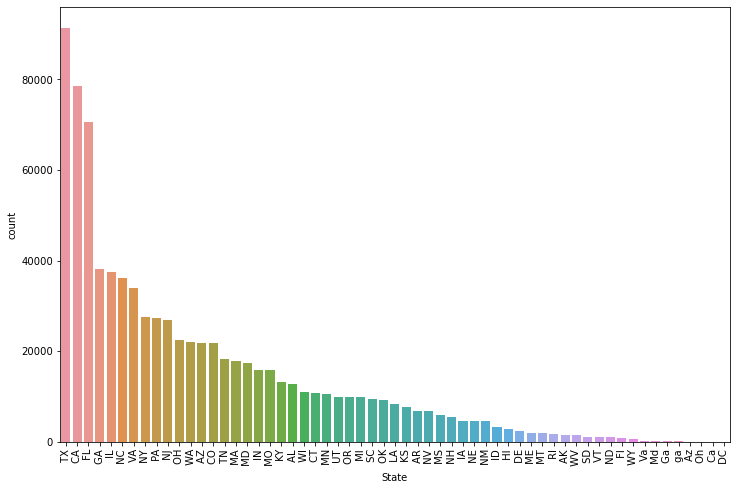

In [15]:
plt.figure(figsize=[12,8])
sns.countplot(car_data['State'],order = car_data['State'].value_counts().index);
plt.xticks(rotation=90)
plt.show()


We can find most of the cars are from state TX, CA , FL,IL

In [16]:
Total_City= car_data.pivot_table(columns=['City'], aggfunc='size').sort_values(ascending=False)
Total_State= car_data.pivot_table(columns=['State'], aggfunc='size').sort_values(ascending=False)
Total_Model= car_data.pivot_table(columns=['Model'], aggfunc='size').sort_values(ascending=False)
Total_Make= car_data.pivot_table(columns=['Make'], aggfunc='size').sort_values(ascending=False)

print("Total",Total_City.shape[0],'Cities')
print("Total",Total_State.shape[0],'State')
print("Total",Total_Model.shape[0],'Model')
print("Total",Total_Make.shape[0],'Make')


Total 2553 Cities
Total 59 State
Total 2576 Model
Total 53 Make


In [17]:
ts=pd.DataFrame(Total_Make)

In [18]:
file_name = 'make.xlsx'
# saving the excel
ts.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


Creating two derived columns Current year and condition (Lower the value od car condition better the car)

In [19]:
Current_year=2022

car_data['Year_used']=(Current_year-car_data['Year'])

car_data['Condition']=(car_data['Mileage']/car_data['Year_used'])

car_data.head()


,Price,Year,Mileage,City,State,Vin,Make,Model,Year_used,Condition
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed,8,4465.625000
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed,9,2178.444444
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed,9,5427.888889
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed,8,4990.250000
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic,6,3690.333333


Dropping the Vin column founded to be on no use

In [20]:
car_data.drop(columns='Vin',inplace=True)



In [21]:
car_data.describe()

,Price,Year,Mileage,Year_used,Condition
count,826724.000000,826724.000000,826724.000000,826724.000000,826724.000000
mean,21008.595685,2013.435411,49866.119674,8.564589,5437.932315
std,10502.912427,3.215227,35565.529267,3.215227,2788.801696
min,1500.000000,1997.000000,5.000000,4.000000,0.250000
25%,13495.000000,2012.000000,23844.000000,6.000000,3426.333333
50%,18597.000000,2014.000000,39884.500000,8.000000,5234.857143
75%,26990.000000,2016.000000,69915.000000,10.000000,7209.279545
max,60987.000000,2018.000000,165156.000000,25.000000,31374.600000


Checking the unique number of data in cities and state as well as model and make 

Most of the cars that we have are from TX , CA , Fl states

In [22]:
# Bivariate analysis 
# we can find that most of relation in continuos variable :
# we find that there is a postive corelation between 'Price ' and 'Year'
# we find that there is a negative corelation between 'Price ' and 'Mileage'


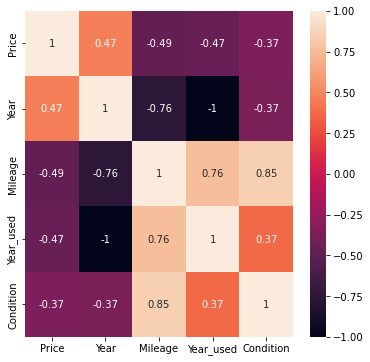

In [23]:
plt.figure(figsize=[6,6])
sns.heatmap(car_data.corr(),  annot=True)
plt.show()


In this correlation we can find that mostly 'price' and 'year' are positive correlated (+0.48) and 'price' and 
'mileage' are negative correlated (-0.76)

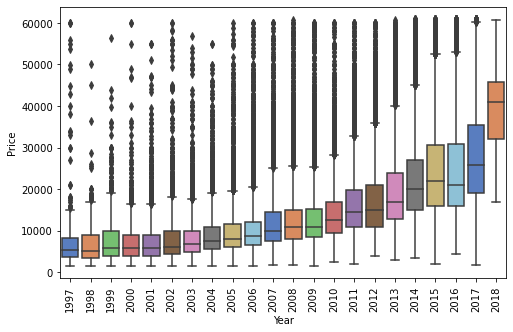

In [24]:
plt.figure(figsize=[8,5])
sns.boxplot(data=car_data, x='Year', y='Price', palette='muted')
plt.xticks(rotation=90)
plt.show()

Through this box plot we can find the relation between year and price and we can conclude that we cannnot remove 2018 as outlier as it cointain high price value , we can remove the data below 2003 beacuse price are also too low less than 10 K

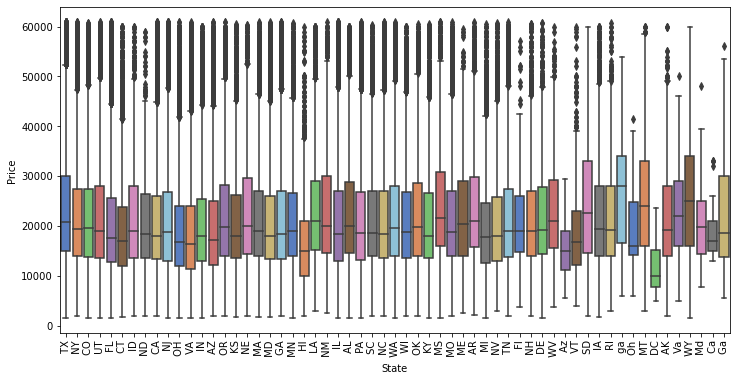

In [25]:
plt.figure(figsize=[12,6])
sns.boxplot(data=car_data, x='State', y='Price', palette='muted')
plt.xticks(rotation=90)
plt.show()

Through this we can find we can easily get rid of few states only which have very less price else mostly all the state are havign decent price

In [26]:
#sns.pairplot(data=car_data,x_vars=['Year','Mileage'],y_vars='Price')

Using the scatter trying to get how data is distributed among the year and mileage wrt to price which we finded that they are mostly distributed evenly

In [27]:
#sns.regplot(x='Year',y='Price',data=car_data)

#Encoding

Importing the encoder module

In [28]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


Using binary encording for categorical vaiable as our data is nominal and it suit best 

In [29]:
# Encoding

import category_encoders as ce

colus=car_data.drop(['Price','Year','Mileage','Year_used','Condition'], axis=1)

nums=car_data.drop(['City','State','Make','Model'], axis=1)

ce_binary = ce.BinaryEncoder(cols = ['City','State','Make','Model'])

# fit and transform and prest, you've got encoded data

dat=ce_binary.fit_transform(colus,nums)


result = pd.concat([nums, dat], axis=1)
result.head()

#car_data.head()

,Price,Year,Mileage,Year_used,Condition,City_0,City_1,City_2,City_3,City_4,...,Model_2,Model_3,Model_4,Model_5,Model_6,Model_7,Model_8,Model_9,Model_10,Model_11
0,8995,2014,35725,8,4465.625000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,10888,2013,19606,9,2178.444444,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,8995,2013,48851,9,5427.888889,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,10999,2014,39922,8,4990.250000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,14799,2016,22142,6,3690.333333,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [30]:
car_data_enc=result

In [31]:
car_data_enc.describe()

,Price,Year,Mileage,Year_used,Condition,City_0,City_1,City_2,City_3,City_4,...,Model_2,Model_3,Model_4,Model_5,Model_6,Model_7,Model_8,Model_9,Model_10,Model_11
count,826724.000000,826724.000000,826724.000000,826724.000000,826724.000000,826724.000000,826724.000000,826724.000000,826724.000000,826724.000000,...,826724.000000,826724.000000,826724.000000,826724.000000,826724.000000,826724.000000,826724.000000,826724.000000,826724.000000,826724.000000
mean,21008.595685,2013.435411,49866.119674,8.564589,5437.932315,0.040442,0.202392,0.296159,0.404656,0.448436,...,0.466758,0.591144,0.457941,0.416815,0.522460,0.476856,0.511226,0.468657,0.487809,0.533538
std,10502.912427,3.215227,35565.529267,3.215227,2788.801696,0.196993,0.401783,0.456562,0.490826,0.497334,...,0.498894,0.491623,0.498228,0.493032,0.499496,0.499464,0.499874,0.499017,0.499852,0.498874
min,1500.000000,1997.000000,5.000000,4.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13495.000000,2012.000000,23844.000000,6.000000,3426.333333,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,18597.000000,2014.000000,39884.500000,8.000000,5234.857143,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,26990.000000,2016.000000,69915.000000,10.000000,7209.279545,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,60987.000000,2018.000000,165156.000000,25.000000,31374.600000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Using this reg plot we got information regarding how price and year is correlated with positive slope and negative intercept


# Spliting data file into Train and test data set

In [32]:
X=car_data_enc.drop(['Price'],1)
X.head()

,Year,Mileage,Year_used,Condition,City_0,City_1,City_2,City_3,City_4,City_5,...,Model_2,Model_3,Model_4,Model_5,Model_6,Model_7,Model_8,Model_9,Model_10,Model_11
0,2014,35725,8,4465.625000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2013,19606,9,2178.444444,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2013,48851,9,5427.888889,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2014,39922,8,4990.250000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2016,22142,6,3690.333333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()                                             
scaler.fit(X)
X_check= scaler.transform(X)
print(X_check)

[[0.80952381 0.21628691 0.19047619 ... 0.         0.         1.        ]
 [0.76190476 0.11868532 0.23809524 ... 0.         1.         0.        ]
 [0.76190476 0.29576569 0.23809524 ... 0.         0.         1.        ]
 ...
 [0.95238095 0.01494995 0.04761905 ... 1.         1.         0.        ]
 [0.9047619  0.17520935 0.0952381  ... 1.         1.         0.        ]
 [0.95238095 0.01816519 0.04761905 ... 0.         0.         0.        ]]


In [34]:
y=car_data_enc['Price']
y.head()

0     8995
1    10888
2     8995
3    10999
4    14799
Name: Price, dtype: int64

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y, train_size=0.9, test_size=0.1,random_state=95)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(744051, 40)
(82673, 40)
(744051,)


# Normalise the value using min max scalar

In [36]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)

#scaler.fit(X_test)
#X_test_std = scaler.transform(X_test)

In [37]:
!pip install xgboost

#Xtreme gradient boosting

In [244]:
# importing the XG boost model
import xgboost as xgb

# Making a data matrix that Xg model undesrstands
data_dmatrix = xgb.DMatrix(data=X,label=y)
xgbr_params = {'n_estimators': 500,
          'colsample_bytree': 0.3,
          'learning_rate': 0.1,
          'max_depth': 10,
          'alpha': 10,
          'objective': 'reg:squarederror'}
#Changing the xg model parameters for modelling
xg_reg = xgb.XGBRegressor(**xgbr_params)


# trainning the model 
xg_reg.fit(X_train_std,y_train)

# predicting the y test and y train
y_test_preds = xg_reg.predict(X_test_std)
y_train_preds = xg_reg.predict(X_train_std)

train_acur=xg_reg.score(X_train_std, y_train)
train_acur=train_acur*100


test_acur=xg_reg.score(X_test_std, y_test)
test_acur=test_acur*100





In [245]:

# printing the model accuracy 

print("XGModel Accuracy Train: %.4f" % train_acur,'%')
print("XGModel Accuracy Test: %.4f" % test_acur,'%')
rmse_1 = np.sqrt(mean_squared_error(y_train, y_train_preds))
print("Train - RMSE: %f" % (rmse_1))
rmse = np.sqrt(mean_squared_error(y_test, y_test_preds))
print("Test - RMSE: %f" % (rmse))

NRMSE_1=rmse_1/(car_data_enc['Price'].max()-car_data_enc['Price'].min())
print("NRMSE Train: %f" % (NRMSE_1))

# normalize rmse error   rsme/(price max- price min)  
NRMSE=rmse/(car_data_enc['Price'].max()-car_data_enc['Price'].min())
print("NRMSE Test: %f" % (NRMSE))

XGModel Accuracy Train: 92.6556 %
XGModel Accuracy Test: 89.3615 %
Train - RMSE: 2846.286154
Test - RMSE: 3426.451087
NRMSE Train: 0.047847
NRMSE Test: 0.057600


In [246]:
xg_reg.predict(X_check[:5])

array([16630.516, 14015.161, 15525.062, 16008.462, 21360.045],
      dtype=float32)

In [247]:
new_xgb=car_data

In [248]:
Xg_n=new_xgb.drop(['Price'],1)

Xg_n.head()

,Year,Mileage,City,State,Make,Model,Year_used,Condition
0,2014,35725,El Paso,TX,Acura,ILX6-Speed,8,4465.625000
1,2013,19606,Long Island City,NY,Acura,ILX5-Speed,9,2178.444444
2,2013,48851,El Paso,TX,Acura,ILX6-Speed,9,5427.888889
3,2014,39922,Windsor,CO,Acura,ILX5-Speed,8,4990.250000
4,2016,22142,Lindon,UT,Acura,ILXAutomatic,6,3690.333333


In [249]:
yg_n=new_xgb['Price']
yg_n=yg_n.values.reshape(-1,1)

In [250]:
from sklearn.compose import make_column_transformer
import category_encoders as ce

col_tra = make_column_transformer((MinMaxScaler(), ['Year', 'Mileage','Year_used', 'Condition']),
    (ce.BinaryEncoder(),['City','State','Make','Model']))

In [251]:
col_tra

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['Year', 'Mileage', 'Year_used', 'Condition']),
                                ('binaryencoder', BinaryEncoder(),
                                 ['City', 'State', 'Make', 'Model'])])

In [252]:
col_tra.fit_transform(Xg_n)

array([[0.80952381, 0.21628691, 0.19047619, ..., 0.        , 0.        ,
        1.        ],
       [0.76190476, 0.11868532, 0.23809524, ..., 0.        , 1.        ,
        0.        ],
       [0.76190476, 0.29576569, 0.23809524, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.95238095, 0.01494995, 0.04761905, ..., 1.        , 1.        ,
        0.        ],
       [0.9047619 , 0.17520935, 0.0952381 , ..., 1.        , 1.        ,
        0.        ],
       [0.95238095, 0.01816519, 0.04761905, ..., 0.        , 0.        ,
        0.        ]])

In [253]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

In [254]:
pipe_xgb=make_pipeline(col_tra,xg_reg)


In [255]:
print(Xg_n[:1])

   Year  Mileage     City State   Make       Model  Year_used  Condition
0  2014    35725  El Paso    TX  Acura  ILX6-Speed          8   4465.625


In [256]:
pipe_xgb.predict(Xg_n[:5])

array([16630.516, 14015.161, 15525.062, 16008.462, 21360.045],
      dtype=float32)

In [257]:
import pickle


with open('model2_pkl', 'wb') as files:    # saveing model
    pickle.dump(pipe_xgb, files)


In [258]:
with open('model2_pkl' , 'rb') as f:
    lr_che = pickle.load(f)                 #

In [259]:
Xg_n[:2]

,Year,Mileage,City,State,Make,Model,Year_used,Condition
0,2014,35725,El Paso,TX,Acura,ILX6-Speed,8,4465.625000
1,2013,19606,Long Island City,NY,Acura,ILX5-Speed,9,2178.444444


In [260]:
print(type(Xg_n[:1]))

<class 'pandas.core.frame.DataFrame'>


In [261]:
t_1=Xg_n[:5].to_numpy()

In [262]:
print(t_1)

[[2014 35725 'El Paso' ' TX' 'Acura' 'ILX6-Speed' 8 4465.625]
 [2013 19606 'Long Island City' ' NY' 'Acura' 'ILX5-Speed' 9
  2178.4444444444443]
 [2013 48851 'El Paso' ' TX' 'Acura' 'ILX6-Speed' 9 5427.888888888889]
 [2014 39922 'Windsor' ' CO' 'Acura' 'ILX5-Speed' 8 4990.25]
 [2016 22142 'Lindon' ' UT' 'Acura' 'ILXAutomatic' 6 3690.3333333333335]]


In [263]:
print(type(t_1))

<class 'numpy.ndarray'>


In [264]:
t_2=pd.DataFrame(t_1)

In [265]:
t_2.rename(columns = {0:'Year', 
                       1:'Mileage',
                      2:'City', 
                       3:'State',
                      4:'Make', 
                       5:'Model',
                      6:'Year_used', 
                       7:'Condition',
                                 }, 
            inplace = True)

In [266]:
t_2

,Year,Mileage,City,State,Make,Model,Year_used,Condition
0,2014,35725,El Paso,TX,Acura,ILX6-Speed,8,4465.625
1,2013,19606,Long Island City,NY,Acura,ILX5-Speed,9,2178.444444
2,2013,48851,El Paso,TX,Acura,ILX6-Speed,9,5427.888889
3,2014,39922,Windsor,CO,Acura,ILX5-Speed,8,4990.25
4,2016,22142,Lindon,UT,Acura,ILXAutomatic,6,3690.333333


In [267]:
lr_che.predict(t_2)

array([16630.516, 14015.161, 15525.062, 16008.462, 21360.045],
      dtype=float32)

#Grasdient boosting

In [37]:
# applying gradient boosting
gbr_params = {'n_estimators': 1,
          'max_depth': 10,
          'min_samples_split': 5,
          'learning_rate': 0.1,
          'loss': 'ls'}

gbr = GradientBoostingRegressor(**gbr_params)  
#gbr.fit(X_train_std, y_train) 

y_train_pred=gbr.predict(X_train_std)
y_test_pred=gbr.predict(X_test_std)

train_acur=gbr.score(X_train_std, y_train)
train_acur=train_acur*100
test_acur=gbr.score(X_test_std, y_test)
test_acur=test_acur*100



NotFittedError: This GradientBoostingRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:


# printing the model accuracy 

print("GBModel Accuracy Train: %.4f" % train_acur,'%')

print("GBModel Accuracy Test: %.4f" % test_acur,'%')

# Create the mean squared error

rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred ))
print("(RMSE) on train set: {:.4f}".format(rmse_train))
rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred ))
print("(RMSE) on test set: {:.4f}".format(rmse_test))


NRMSE_train=rmse_train/(car_data_enc['Price'].max()-car_data_enc['Price'].min())
print("NRMSE Train: %f" % (NRMSE_train))
NRMSE_test=rmse_test/(car_data_enc['Price'].max()-car_data_enc['Price'].min())
print("NRMSE Train: %f" % (NRMSE_test))

In [ ]:
test_score = np.zeros((gbr_params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(gbr.staged_predict(X_test_std)):
    test_score[i] = gbr.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(gbr_params["n_estimators"]) + 1,
    gbr.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(gbr_params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

Artificial Neural Network

In [ ]:
!pip install keras-tuner --upgrade
!pip install tensorflow
!pip install keras


In [ ]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [ ]:
X1=X
X1.head()

In [ ]:
y1=y
y1=y1.values.reshape(-1,1)
y1.shape

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X1)
X_new = scaler.transform(X1)


In [ ]:
X_train_ch,X_test_ch,y_train_ch,y_test_ch=train_test_split(X_new,y1, train_size=0.9, test_size=0.1,random_state=95)

In [ ]:
from keras.models import Sequential   # 
from keras.layers import Dense

In [ ]:
model = Sequential()
#input
model.add(Dense(units=2048, input_dim=40, kernel_initializer='normal', activation='relu'))
#1
model.add(Dense(units=1024, kernel_initializer='normal', activation='relu'))
#2
model.add(Dense(units=512, kernel_initializer='normal', activation='relu'))
#3
model.add(Dense(units=256, kernel_initializer='normal', activation='relu'))
#4
model.add(Dense(units=128, kernel_initializer='normal', activation='relu'))
#5
model.add(Dense(units=64, kernel_initializer='normal', activation='relu'))
#6
model.add(Dense(units=32, kernel_initializer='normal', activation='relu'))
#7
model.add(Dense(units=16, kernel_initializer='normal', activation='relu'))
#8
model.add(Dense(units=8, kernel_initializer='normal', activation='relu'))
#9
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mae','mse'])

#history=model.fit(X_train_ch, y_train_ch ,batch_size = 1000, epochs = 5)



In [ ]:
test_loss = model.evaluate(X_test_ch,y_test_ch)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn import metrics

In [ ]:

loss = history.history['loss']
acc = history.history['mse']


pyplot.plot(history.history['mse'])


pyplot.show()
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.legend()
plt.show()

y_pred = model.predict(X_test_ch)

plt.plot(y_test_ch, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [ ]:

# Predict
pred = model.predict(X_test_ch)

# Measure MSE error.  
score = np.sqrt(metrics.mean_squared_error(pred,y_test_ch))
print("Final score (RMSE): {}".format(score))

In [ ]:
from sklearn.metrics import r2_score

y_train_pred = model.predict(X_train_ch)
y_test_pred = model.predict(X_test_ch)

# Calculates and prints r2 score of training and testing data
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train_ch, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test_ch, y_test_pred)))

In [ ]:
#sns.regplot(y_test_ch, pred)

In [ ]:
plt.hist(y_test_ch - pred)

In [ ]:
predictions = model.predict(X_test_ch[:10])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test_ch[:10])

In [ ]:
def chart_regression(pred, y1, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y1.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

In [ ]:
chart_regression(pred.flatten(),y_test_ch)

In [ ]:
model.predict(X_test_ch[:10])

In [ ]:
#model.save('myModel2.h5')
#import tensorflow as tf
#new_model = tf.keras.models.load_model('myModel2.h5')

In [ ]:
X_test_ch[:1]

In [ ]:
#new_model.predict(X_test_ch[:10])

In [ ]:
print(X_test_ch[:1])

In [ ]:
te=[[0.85714286, 0.19958704 ,0.14285714 ,0.150101 ,  1.       ,  0.,
  0.    ,     0.    ,     1.     ,    1.        , 1.    ,     0.,
  1.    ,     0.    ,     1.    ,     1.       ,  0.     ,    0.,
  1.    ,     0.    ,     0.    ,     1.       ,  1.     ,    1.,
  0.    ,     0.    ,     1.    ,     1.      ,   1.     ,    0.,
  0.    ,     0.     ,    1.    ,     1.      ,   0.     ,    0.,
  1.    ,     0.    ,     1.     ,    0.        ]]

In [ ]:
#new_model.predict(te)

In [ ]:
new_data=car_data

In [ ]:
from sklearn.compose import make_column_transformer

In [ ]:
new_data.head()

In [ ]:
X_n=new_data.drop(['Price'],1)

X_n.head()



In [ ]:
scaled_features.head()

In [ ]:
y_new=new_data['Price']
y_new=y_new.values.reshape(-1,1)

In [ ]:
from sklearn.compose import make_column_transformer
import category_encoders as ce
col_tra = make_column_transformer((MinMaxScaler(), ['Year', 'Mileage', 'Year_used', 'Condition']),
    (ce.BinaryEncoder(),['City','State','Make','Model']))

#col_tra = ColumnTransformer([(MinMaxScaler(),['Year', 'Mileage', 'Year_used', 'Condition']),
 #   (ce.BinaryEncoder(),['City','State','Make','Model'])  ])

#transformer = ColumnTransformer(transformers=[
 #   ('tnf1',MinMaxScaler(),['Year', 'Mileage', 'Year_used', 'Condition']),
  #  ('tnf2',ce.BinaryEncoder(),['City','State','Make','Model'])])   
    

In [ ]:
col_tra

In [ ]:
col_tra.fit_transform(X_n)
#col_tran = transformer.fit_transform(X_n)

In [ ]:
print(col_tra)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

In [ ]:
pipe=make_pipeline(col_tra,model)


In [ ]:
model.summary()

In [ ]:
X_new=pd.DataFrame(X_new)
X_new.head()

In [ ]:
model.predict(X_new[:10])

In [ ]:
X_n.shape

In [ ]:
pipe.predict(X_n[:10])